# <center>DATA BOOTCAMP</center>



# jupyter.databootcamp.com.br
# usuario = primeira parte do seu email
# senha = bootcamp

# Estatística

## 1- Introdução e Probabilidade

### Em estatística tudo começa com PROBABILIDADE

Probabilidade é o estudo das chances de obtenção de cada resultado de um experimento aleatório.

## É de conhecimento geral que se jorgarmos uma moeda 50x ela vai cair 25x cara!
Como podemos provar isso?

In [301]:
import numpy as np #pacote numérico usado na maioria das aplicações python

In [302]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

r = np.random.randint(minimo_inclusivo, maximo_exclusivo, total_de_resultados)
r
#esse cara retorna uma lista de Eventos com 50 valores 0 (coroa) e 1 (cara)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1])

In [303]:
sum(r)

22

In [304]:
sum(r)/len(r)

0.44

** Esse resultado é de uma Distribuição Binomial. **

Pois existem apenas dois resultados, mutualmente exclusivos e as n tentativas são *independentes*.

Por ser uma distribuição binomial podemos calcular o número de jogadas com sucesso (1) apenas somando todos os valores

Um experimento aleatório pode ser repetido inúmeras vezes e nas mesmas condições e, mesmo assim, apresenta resultados diferentes. Cada um desses resultados possíveis é chamado de **ponto amostral**. 

In [305]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 10000

resultado = np.random.randint(minimo_inclusivo, maximo_exclusivo,
                              total_de_resultados)
sum(resultado)

4993

In [306]:
sum(resultado)/len(resultado)

0.4993

### Também podemos mostrar esse experimento de forma gráfica

In [307]:
%matplotlib inline 
#comando para dizer pro Jupyter exibir os gráficos
import seaborn as sns #pacote grafico que deixa as coisas mais bonitas :)

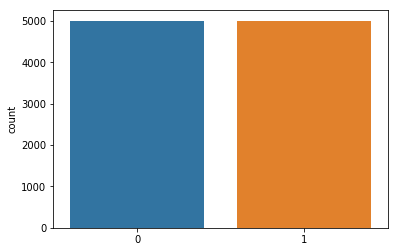

In [308]:
sns.countplot(resultado) #esse grafico pega os resultados e agrupa

### Isso que nós acabamos de fazer foi um experimento. Para diminuirmos a aleatoriedade devemos repetir esse experimento mais vezes

#### Primeiro vamos separar o código do sorteio em uma função

In [309]:
np.random.randint?

In [310]:
def contador_de_caras():
    resultado_das_jogadas = np.random.randint(0,2,50)
    soma = sum(resultado_das_jogadas)
    return soma

In [311]:
contador_de_caras()

31

#### Agora vamos criar uma função que repita esse experimento e coloque o resultado em uma lista

In [312]:
list(range(5))

[0, 1, 2, 3, 4]

In [313]:
def simulador_jogadas_de_moeda(qtd_de_experimentos):

    qtd_caras = list()
    #esse for faz ele repetir o codigo dele o numero de vezes que passamos
    for repeticao in range(qtd_de_experimentos): 
        caras = contador_de_caras()
        #pega o resultado da soma e inclui na lista
        qtd_caras.append(caras) 
    
    return qtd_caras

In [314]:
simulador_jogadas_de_moeda(10)

[23, 20, 24, 32, 25, 25, 27, 25, 26, 26]

In [315]:
simulador = simulador_jogadas_de_moeda(10)

In [316]:
simulador

[17, 19, 30, 22, 26, 21, 20, 19, 26, 25]

### Uma forma fácil de ver esse resultado é olhando os resultados de forma agrupada

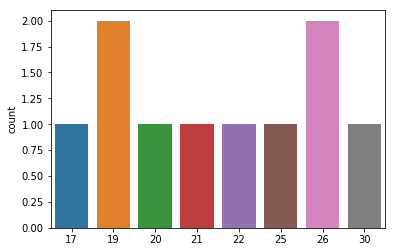

In [317]:
%matplotlib inline
sns.countplot(simulador)

## <font color='blue'>Como podemos aumentar a chance de cair 25? Faça :)</font>

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

### Devemos chamar o simulador para mais jogadas/experimentos

In [318]:
total_jogadas = 9000
simulador = simulador_jogadas_de_moeda(total_jogadas)

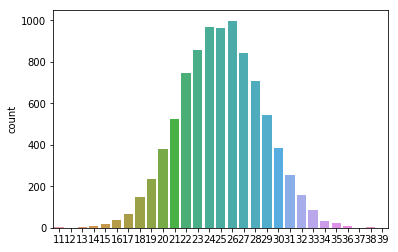

In [319]:
sns.countplot(simulador)

### Podemos usar o distplot que é uma junção do Histograma com o KDE

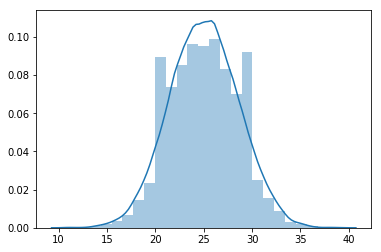

In [320]:
# %matplotlib inline
import matplotlib.pyplot as plt

sns.distplot(simulador, bins=25)
# plt.semilogy()

#### o distplot permite configurar o numero de agrupamentos, o padrão é 10

In [321]:
sns.distplot?

In [322]:
type(simulador)

list

In [323]:
import pandas
pandas.Series(simulador).describe()

count    9000.000000
mean       25.032111
std         3.556315
min        11.000000
25%        23.000000
50%        25.000000
75%        27.000000
max        39.000000
dtype: float64

## Distribuição normal em vídeo (Modelo de probabilidade do Museum of Science de Boston)

In [324]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wUgQtXEodf0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Qual a probabilidade de cair menos de 20x cara no simulador?
#### Primeiro temos que contar quantas vezes caiu menos de 20

In [325]:
menor_20 = 0
for contador_cara in simulador:
    if (contador_cara < 20):
        menor_20 = menor_20 + 1 # == menor_20 += 1
menor_20

520

In [326]:
regra_de_tres = (100 * menor_20/total_jogadas)
print("A probabilidade de cair um número menor que 20 é de", regra_de_tres, "%")

A probabilidade de cair um número menor que 20 é de 5.777777777777778 %


In [327]:
from scipy.stats import binom
binom.cdf(25, 50, 0.5)

0.5561375863296087

In [328]:
binom.pmf(19, 50, 0.5)

0.027005902743581986

------------------------
# 2- Métricas 
Nós vamos revisar as métricas e colocar algumas coisas novas na nossas análises

In [329]:
import pandas
titanic = pandas.read_csv("titanic_fds_2_aula.csv")
titanic.drop(columns = ["AgeFillNaSexMean", "_Faixa_Etaria", "Sobrenome", "WomanName"], inplace = True)

In [330]:
titanic.shape

(891, 15)

In [331]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0


## Média Artimética

É uma medida que tenta encontrar valores centrais de uma distribuição. 

In [332]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [333]:
titanic.Age.mean()

29.69911764705882

### Vamos dar uma olhada mais a fundo pra gente revisar como as médias funcionam

É obtido somando todos os valores e dividindo pelo números de indivíduos da população.
** Ela é fortemente influenciada por valores extremos ** 

In [334]:
valores = [1,1,1,1,10000]

def media(lista):
    return sum(lista) / len(lista)

media(valores)

2000.8

## Quartil / Percentil

São medidas que dividem a amostra ordenada (por ordem crescente dos dados). O percentil é essa medida em 100 partes.

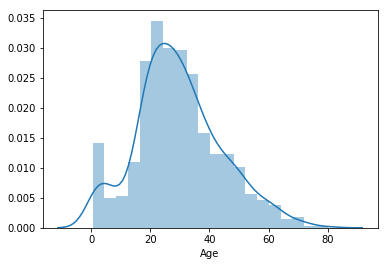

In [335]:
sns.distplot(titanic.Age.dropna())
# plt.semilogy()

In [336]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Para pegarmos o Primeiro Quartil ou percentil 25?

In [337]:
titanic.Age.quantile(0.25) # um quantil é igual ao percentil 100

20.125

## <font color='blue'>Como pegamos o percentil 80? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [338]:
titanic.Age.quantile(0.80)

41.0

In [339]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeRange', 'AgeNotNull',
       'AgeFillNa-1', 'AgeFillNaMean'],
      dtype='object')

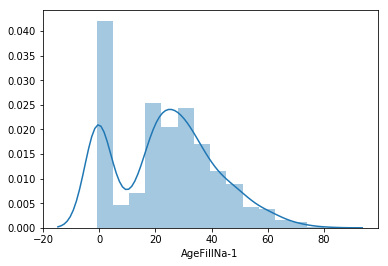

In [340]:
sns.distplot(titanic["AgeFillNa-1"])

## O percentil 50 também é chamado de MEDIANA
Ele é muito usado para encontrar um valor central da sua distribuição. **Não sofre impacto dos valores extremos**

In [341]:
titanic.Age.median()

28.0

In [342]:
titanic.Age.quantile(0.50)

28.0

### Vamos dar uma olhada mais a fundo pra gente revisar como as mediana funcionam

![alt text](https://i.ytimg.com/vi/cVoZja1jbxM/maxresdefault.jpg)

É o valor médio de uma distribuição ordenada, no qual apresenta o mesmo número de valores abaixo e acima desse valor.
Se a distribuição tiver números ímpares ele é um único valor, se a distribuição tiver números pares é a média dos 2 valores centrais.

In [343]:
par = [1, 10, 20, 1000]

In [344]:
np.median(par)

15.0

In [345]:
np.mean(par)

257.75

## <font color='blue'>Qual a mediana da distribuição [1,10,20,30]? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

Como ela é uma distribuição par, o valor da mediana vai ser a média entre os dois elementos centrais (10,20)

In [346]:
par = [0, 10, 20, 30]
np.median(par)

15.0

In [347]:
np.mean(par)

15.0

## Pra que serve saber isso? BoxPlot

É um dos gráficos favoritos para analisar uma distribuição. 
Ele pega os dados que apresentamos no describe e exibe de forma gráfica

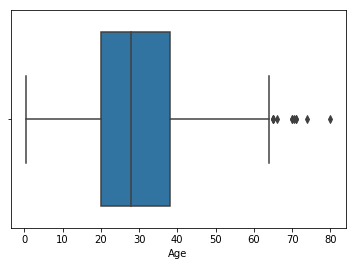

In [348]:
sns.boxplot(titanic.Age)

A interpretação do gráfico é:
- Exibe os percentis 25, 50, 75 em um retangulo que é chamado de IQR (Amplitude Interquartílica): Q3 - Q1
- A whisker inferior (limite inferior) é o percentil 25 (quartil 1) menos 1.5 multiplicado pelo IQR ($LI = Q1 - 1.5 * IQR$)
- A whisker superior (limite superior) é o percentil 75 (quartil 3) mais 1.5 multiplicado pelo IQR ($LS = Q3 + 1.5 * IQR$)
- Os pontos chamados de **outliers** (atípicos)

In [349]:
iqr = titanic.Age.quantile(0.75) - titanic.Age.quantile(0.25)
ls = titanic.Age.quantile(0.75) + 1.5 * iqr
ls

64.8125

In [350]:
li = titanic.Age.quantile(0.25) - 1.5 * iqr
li

-6.6875

In [351]:
iqr

17.875

In [352]:
titanic.Age.median()

28.0

![alt text](https://upload.wikimedia.org/wikipedia/commons/4/46/Diagrama_de_caixa2.png)

In [353]:
# diferenca_inter_quartil = terceiro_quartil - primeiro_quartil

# limite_inferior = primeiro_quartil - 1.5*(diferenca_inter_quartil)

# limite_superior = terceiro_quartil + 1.5*(diferenca_inter_quartil)

### "O grande valor de uma imagem é quando ela nos obriga a notar o que nunca esperávamos ver." - Tukey

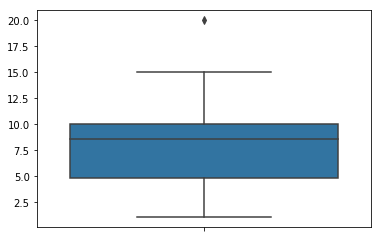

In [354]:
lista = [1,2,3,4,5,6,7,8,9,10,10,10,10,10,15,20]
sns.boxplot(lista, orient="v")

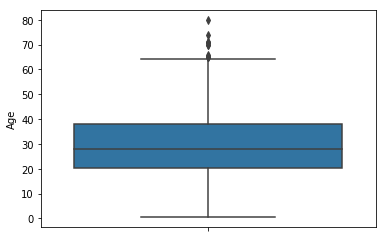

In [355]:
sns.boxplot(titanic.Age, orient="v")

## <font color='blue'>Crie um BoxPlot com o resultado do simulador de jogadas! Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

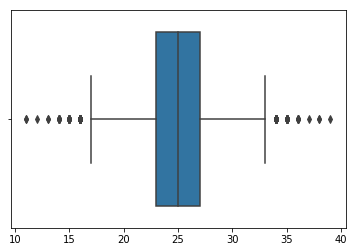

In [356]:
sns.boxplot(simulador)

## SwarmPlot - Ele serve para monstrar a incidência de valores 

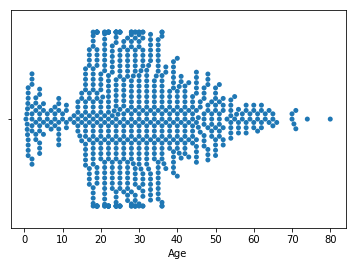

In [357]:
sns.swarmplot(titanic.Age)

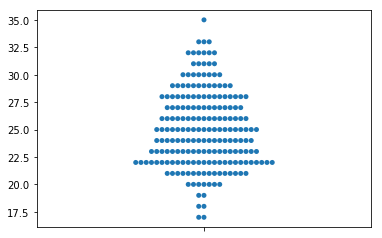

In [358]:
sns.swarmplot(simulador[:200], orient="v")

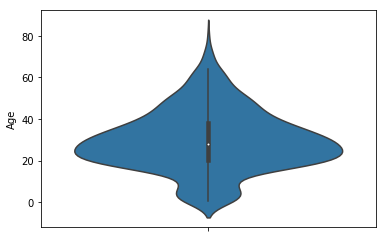

In [359]:
sns.violinplot(titanic.Age, orient="v")

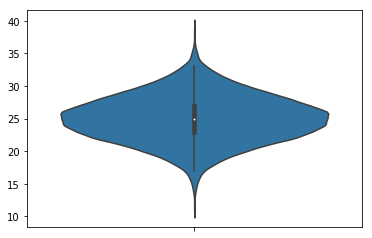

In [360]:
sns.violinplot(simulador, orient="v")

### Vamos colocar um em cima do outro agora

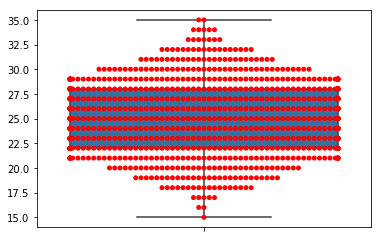

In [361]:
sns.swarmplot(simulador[:1000], orient="v", color="red")
sns.boxplot(simulador[:1000], orient="v")

### Nós também podemos gerar vários boxplots de uma só vez

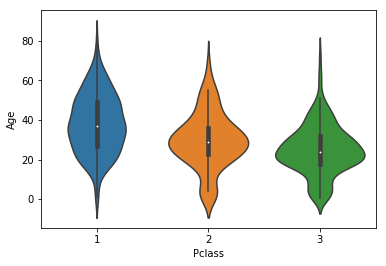

In [362]:
sns.violinplot(x=titanic.Pclass, y=titanic.Age)

-----------
### Antes de voltarmos vamos aprender mais um gráfico legal :)


## Gráfico de dispersão (scatter plot)
Gráfico de Dispersão são utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.
O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados.

O scatter plot usando seaborn pode ser feito de várisa formas. O **LMPLOT** junta o scatter plot tradicional com as retas de medição de uma regressão linear

In [363]:
sns.lmplot?

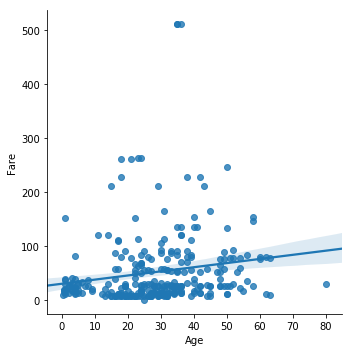

In [364]:
dados_com_vivos = titanic[titanic.Survived==1]
sns.lmplot(x="Age", y="Fare", data = dados_com_vivos, fit_reg=True)

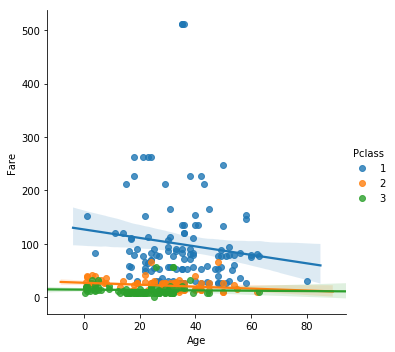

In [365]:
import matplotlib.pyplot as plt
sns.lmplot(data = dados_com_vivos, x="Age", 
           y="Fare", hue='Pclass', fit_reg=True)
# plt.semilogy()

#### O lmplot permite gerar gráficos separados por colunas
#### Vamos gerar um gráfico para quem sobreviveu e outro para não

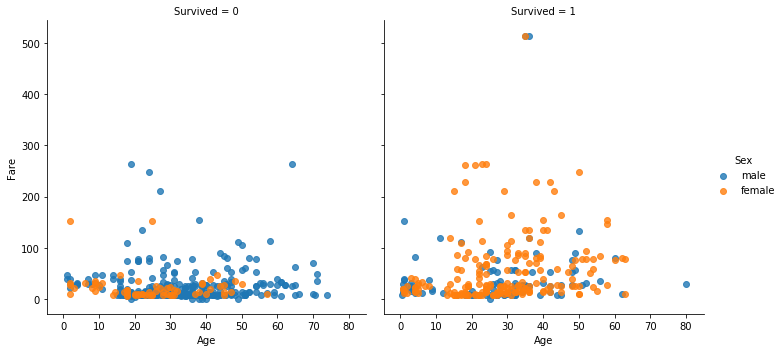

In [366]:
sns.lmplot(data=titanic, x="Age", y="Fare",
           hue='Sex', col="Survived", fit_reg=False)

---------
## Métricas
## Moda

É o valor da distribuição que ocorre com a maior frequência, ou seja, o valor que mais se repete dentro de uma série de observações. 

![alt text](http://www.statisticshowto.com/wp-content/uploads/2013/09/histogram.gif)

In [367]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeRange', 'AgeNotNull',
       'AgeFillNa-1', 'AgeFillNaMean'],
      dtype='object')

In [368]:
#a moda retorna uma lista pois podemos ter mais um de um elemento no top
titanic['AgeFillNa-1'].mode()

0   -1.0
dtype: float64

#### Para pegarmos uma moda só podemos pegar a primeira

In [369]:
titanic.Age.mode()[0]

24.0

In [370]:
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Com essas informações (Média, Mediana e Moda) vemos a assimetria de uma distribuição

![alt text](http://www.durofy.com/wp-content/uploads/2013/07/mode3.png)

Se **Média < Mediana < Moda**, tem a cauda tendendo à esquerda (negativa)

Se **Média == Mediana == Moda**, então a distribuição é aproximadamente simétrica (ou também conhecida como normal)

Se **Média > Mediana > Moda**, tem a cauda tendendo à direita (positiva)

In [371]:
from scipy.stats import kurtosis

kurtosis(titanic.Age.dropna())

0.16863657224286044

In [372]:
kurtosis(simulador)

-0.03138920711310611

In [373]:
def assimetria(coluna):
    if ...:
        return "Negativa"
    elif ...:
        return "Positiva"
    else:
        return "Simetrica"

## <font color='blue'>Faça uma função que retorne a assimetria de qualquer coluna (Serie) :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [374]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    media = coluna.mean()
    mediana = coluna.median()
    if (media < mediana < moda):
        return("negativo")
    elif (media > mediana > moda):
        return("positivo")
    else:
        return("simetrico")

In [375]:
assimetria(titanic.Age)

'positivo'

In [376]:
from scipy.stats import skew


def assimetria_stats(coluna):
    skewness = skew(coluna)
    if skewness > 0.2:
        return "positivo"
    elif skewness < -0.2:
        return "negativo"
    else:
        return "simetrico"

In [377]:
assimetria_stats(titanic["AgeFillNa-1"])

'positivo'

In [378]:
assimetria_stats(simulador)

'simetrico'

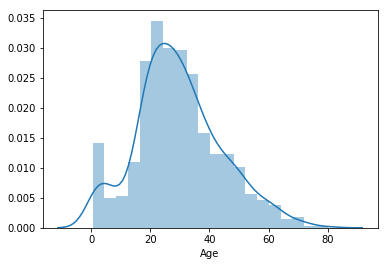

In [379]:
sns.distplot(titanic.Age.dropna())

In [380]:
moda = titanic.Age.mode()
media = titanic.Age.mean()
mediana = titanic.Age.median()

print("moda:", moda[0]) 
print("mediana:", mediana)
print("media:", media)

moda: 24.0
mediana: 28.0
media: 29.69911764705882


---------------
## Medidas de dispersão

## Amplitude ou Range

É a diferença entre o maior e o menor valor do conjunto de dados.

![alt text](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/ebe2.2-650x132.png)

In [381]:
exemplo = [10, 11, 12, 14, 15, 20, 30, 40, 45, 50]

menor = min(exemplo)
maior = max(exemplo)
print("amplitude", maior-menor)

amplitude 40


In [382]:
titanic.Age.max() - titanic.Age.min()

79.58

## Variância
É uma medida de dispersão quadratica que mostra o quão distante cada valor desse conjunto está do valor central.

O cálculo da variância populacional é obtido através da soma dos quadrados da diferença entre cada valor e a média aritmética, dividida pela quantidade de elementos observados. 

![alt text](https://www.wikihow.com/images/thumb/a/a7/Calculate-Variance-Step-10.jpg/aid867321-v4-728px-Calculate-Variance-Step-10.jpg)

### Como podemos tirar no GREGO e colocar em código?

In [383]:
def variancia(lista):
    n = len(lista)
    mu = np.mean(lista)
    numerador = 0
    for observacao in lista:
        numerador = numerador + (observacao - mu)**2
    return numerador/n

variancia([10,9,11,12,8])

2.0

![alt text](https://i.imgur.com/6y9Vnsw.png)

** Quanto menor é a variância, mais próximos os valores estão da média. **
![alt text](https://swh-826d.kxcdn.com/wp-content/uploads/2010/10/bell_curve_normal-curve.gif)

In [384]:
titanic.Age.var()

211.01912474630802

In [385]:
variancia(titanic.Age.dropna())

210.7235797536662

In [386]:
lista_de_exemplo = [1, 1000000000, 50000]
np.var(lista_de_exemplo)

2.2221111144443338e+17

## Desvio Padrão - stddev

O desvio padrão é capaz de identificar o “erro” em um conjunto de dados, caso quiséssemos substituir um dos valores coletados pela média aritmética.

**desvio_padrao = √variancia**

![alt text](http://www.statisticshowto.com/wp-content/uploads/2012/11/standard-deviation-examples1.png)

In [387]:
titanic.Age.std()

14.526497332334042

In [388]:
lista_de_exemplo = [1, 1, 1, 1, 1]
np.std(lista_de_exemplo)

0.0

----

# Correlação


### Correlação é uma medida de afinidade linear entre duas variáveis. Ela varia entre -1 e 1: se assumir o valor -1, as variáveis são totalmente relacionadas uma com a outra, mas enquanto uma cresce, a outra diminui. Quando assume valor 1, vice e versa. Quando for 0, indica que as variáveis não são linearmente relacionadas.

In [389]:
a = np.array(range(1000))
b = (a**2)*(7) + 4
# print(b)

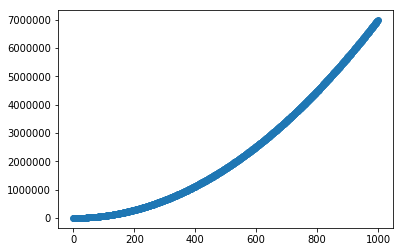

In [390]:
plt.scatter(a, b)

In [391]:
np.corrcoef(a , b)

array([[1.        , 0.96818536],
       [0.96818536, 1.        ]])


### Vamos fazer um gráfico da correlação das colunas numéricas do nosso dataframe

In [392]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,Fare,Relatives,AgeNotNull,AgeFillNa-1,AgeFillNaMean
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143,0.036847,0.037997,0.033207
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639,-0.077221,0.012439,-0.069809
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997,-0.369226,-0.359728,-0.331339
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914,1.000000,1.000000,1.000000
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138,0.096067,0.135707,0.091566
Relatives,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000,-0.301914,-0.147201,-0.248512
AgeNotNull,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914,1.000000,1.000000,1.000000
AgeFillNa-1,0.037997,0.012439,-0.359728,1.000000,0.135707,-0.147201,1.000000,1.000000,0.727691
AgeFillNaMean,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,1.000000,0.727691,1.000000


### Apesar da facilidade, é uma forma meio ruim de visualizar as correlações. Vamos tentar mostrar de uma forma melhor!

In [393]:
corr = titanic.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

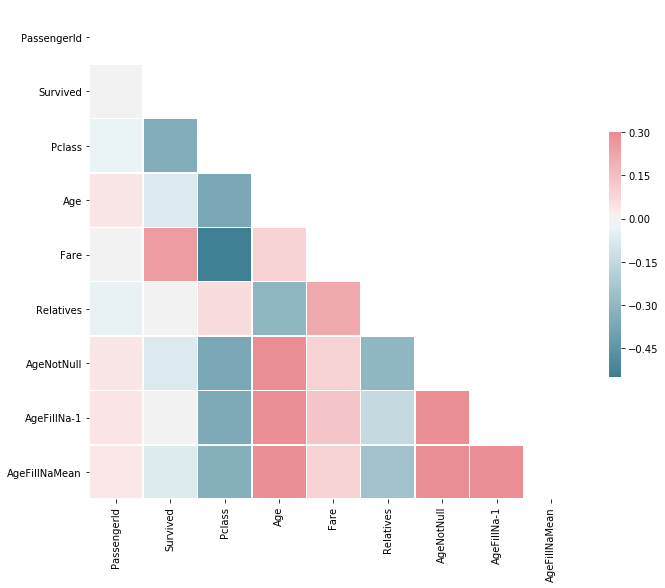

In [394]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))

corr = titanic.corr()
mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,vmax=.3, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5})

-------------
# Vamos falar um pouco sobre AMOSTRA ...

## Inferência estatística
É um conjunto de técnicas que visam estudar uma população através de evidências fornecidas por uma amostra (sample)

## Como selecionar/extrair uma amostra?

In [395]:
import pandas
jogadas = pandas.DataFrame(simulador, columns = ["exp"])

In [396]:
jogadas.head()

,exp
0,25
1,30
2,29
3,22
4,24


### O que costumo fazer é olhar a distribuíção!

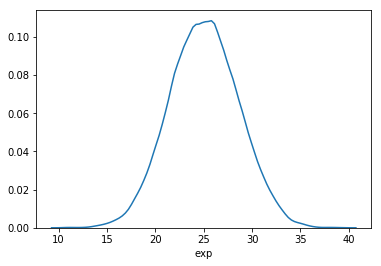

In [397]:
%matplotlib inline

experimentos = jogadas.exp
sns.distplot(experimentos, hist=False)

In [398]:
assimetria(jogadas.exp)

'simetrico'

### O pandas nos entrega uma função de amostra (sample) nela podemos passar a fração da distribuição

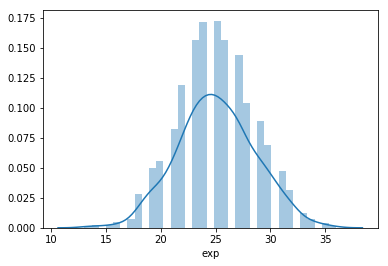

In [399]:
amostra = experimentos.sample(frac=0.2)
sns.distplot(amostra, hist=True)

In [400]:
assimetria(amostra)

'simetrico'

In [401]:
np.std(amostra)

3.5844141350237453

### Uma coisa que sempre vejo é se as curvas estão parecidas

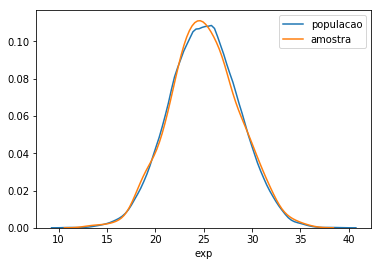

In [402]:
sns.distplot(experimentos, hist=False, label = "populacao")
sns.distplot(amostra, hist=False, label = "amostra")

### Outra forma é ver as médias dos dados

In [403]:
print(experimentos.mean())
print(amostra.mean())

25.03211111111111
25.044444444444444


### Junto com o desvio padrão a gente consegue ver se os erros continuam iguais

In [404]:
print(experimentos.std())
print(amostra.std())

3.556314685223536
3.585410220671714


______________

# Distribuição Normal

A distribuição normal tem como caracteristica o formato de sino e se imaginarmos uma reta no meio do gráfico (mediana) os dados estão igualmente distribuídos (simetrico ao centro).

Nós vemos amostras nessa distribuíção em diversos casos: altura das pessoas, aferição de pressão sanguínea, salarios, resultados de testes de QI, etc..

![alt text](http://www.mathsisfun.com/data/images/normal-distrubution-large.svg)

### A distribuição Normal é muito famosa e importante pois é requisito para diversos algoritmos e modelos estatísticos, como Regressão Linear, Processos Gaussianos, Testes de Hipótese de Médias e Intervalos de Confiança.

---

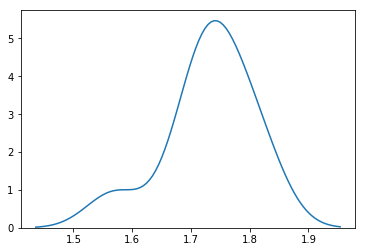

In [405]:
alturas = [1.73, 1.7, 1.81, 1.74, 1.7, 1.75, 1.76, 1.82, 1.57]
sns.distplot(alturas, hist=False)

In [406]:
assimetria(pandas.Series(alturas))

'simetrico'

### Como verificar se uma distribuição é normal?

Esta função testa a hipótese nula de que uma amostra vem
de uma distribuição normal. É baseado em Teste de D'Agostino e Pearson 
que combina inclinação e curtose a produzir um teste global de normalidade.


#### 95% de confianca --> pvalor >= 0.05 para que a hipotese nula seja verdadeira

#### 99% de confianca --> pvalor >= 0.01 para que a hipotese nula seja verdadeira

In [407]:
from scipy import stats

In [408]:
stats.normaltest?

In [409]:
z, pvalue = stats.normaltest(amostra)
if(pvalue >= 0.05):
    print("Distribuição é Normal", pvalue)
else:
    print("Não é uma distribuição normal", pvalue)

Distribuição é Normal 0.883291085370076


## <font color='blue'>Verifique se e normal a distribuicao da idade no titanic :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [410]:
def verificador_de_normal(lista):
    z, pvalue = stats.normaltest(lista)
    if(pvalue >= 0.05):
        print("Distribuição é Normal", pvalue)
    else:
        print("Não é uma distribuição normal", pvalue)

In [411]:
verificador_de_normal(titanic.Age.dropna())

Não é uma distribuição normal 0.00011709599657350757


### Existem outros testes que verificam, de maneira diferente, se uma distribuição é ou não Normal

#### Shapiro Test

In [412]:
stats.shapiro?

In [413]:
z, pvalue = stats.shapiro(titanic.Age.dropna())
if(pvalue >= 0.05):
    print("Distribuição é Normal", pvalue)
else:
    print("Não é uma distribuição normal", pvalue)

Não é uma distribuição normal 7.322165629375377e-08


#### Anderson-Darling Test

In [414]:
stats.anderson?

In [415]:
z, critical_value, percentis = stats.anderson(titanic.Age.dropna(), dist='norm')

In [416]:
print("Estatistica de Teste: {}".format(z))
print("Valores Criticos: {}".format(critical_value))
print("Percentis: {}".format(percentis))

Estatistica de Teste: 3.8230373853616584
Valores Criticos: [0.573 0.652 0.783 0.913 1.086]
Percentis: [15.  10.   5.   2.5  1. ]


 ---
 
# Intervalo de Confiança e Margem de erro 

### O intervalo de confiança é utilizado quando o mais importante não é fazer estimativas pontuais, mas sim identificar onde as observações deveriam estar. Para isso, eu construo um intervalo que me dira, com x% de probabilidade, que as observações futuras sempre caem no intervalo feito.

### A margem de erro será o quanto eu estou aceitando errar, ou seja, é a amplitude do meu intervalo

![alt text](https://swh-826d.kxcdn.com/wp-content/uploads/2010/10/bell_curve_normal-curve.gif)

#### Vamos fazer um intervalo de confiança para a média de jogadas que contenha 95% dos valores

In [417]:
from scipy import stats
import numpy as np
import pandas as pd


media = np.mean(jogadas.exp)
desvio_padrao = np.std(jogadas.exp)

print("media: {}".format(media))
print("desvio padrao: {}".format(desvio_padrao))
 
#A location (loc) é uma média.
#A escala (scale) é o desvio padrão.
 
stats.norm.interval(0.95, loc = media, scale = desvio_padrao)
#95% dos valores estão nesse range

media: 25.03211111111111
desvio padrao: 3.5561171066970236


(18.062249657178164, 32.001972565044056)

### Margem de erro não é mágica!

In [418]:
confianca = 0.99

q = 1 - (1-confianca)/2
q

0.995

In [419]:
print("limite inferior = {}".format(media - stats.norm.ppf(0.975) * desvio_padrao))
print("limite superior = {}".format(media + stats.norm.ppf(0.975) * desvio_padrao))

limite inferior = 18.062249657178164
limite superior = 32.001972565044056


In [420]:
# https://www.google.com.br/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwi_kr2G44jdAhUGFJAKHQq0BYcQjRx6BAgBEAU&url=https%3A%2F%2Fslideplayer.com%2Fslide%2F8338113%2F&psig=AOvVaw0px7SXn0maa92kUKr1gLzk&ust=1535306074298591

## <font color='blue'>Façam um intervalo de 95% de confiança para o Fare das passagens do Titanic</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [421]:
media_fare = titanic.Fare.mean()
std_fare = titanic.Fare.std()

intervalo_95_fare = stats.norm.interval(0.95 , loc = media_fare , scale = std_fare)

print('95% dos valores estão nesse range: {}'.format(intervalo_95_fare))

95% dos valores estão nesse range: (-65.1931223502127, 129.60153828736196)


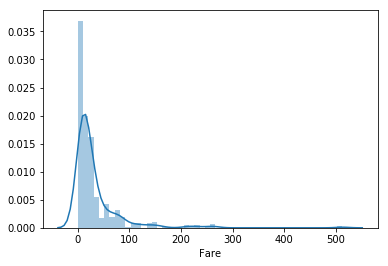

In [422]:
sns.distplot(titanic.Fare.dropna())

---

# Teste de Hipótese de Médias


Durante nossas análises, frequentemente temos que decidir se um grupo dos nossos dados tem valores maiores ou menores do que um outro grupo, dos mesmos dados. Como exemplo, será que as mulheres da sala tem idade maior do que a dos homens? Para responder essa pergunta, provavelmente iriamos as médias das idades dos dois grupos. Mas será que a variação da idade dentro de cada grupo não importa?

Então, a forma mais usada de se comparar variáveis iguais para grupos diferentes é o Teste de Médias de Student. O teste t de Student, ou somente teste t, é um teste de hipótese que usa conceitos estatísticos para rejeitar ou não uma hipótese nula quando a estatística de teste segue uma distribuição t de Student. Essa premissa é usada quando a a variável tem distribuição normal, mas não sabemos sua variância verdadeira, pois estamos trabalhando com amostras.


![alt text](https://upload.wikimedia.org/wikipedia/commons/0/0d/Teste-de-hip%C3%B3teses.gif)


<br>


### Sob a hipótese nula, as médias propostas são iguais. Se o p-valor (erro do tipo I) for menor do que 5%, rejeitamos a hipótese nula com 95% de confiança

In [423]:
stats.ttest_ind?

#### Vamos testar se a media de duas amostras de jogadas são Estatisticamente Iguais, a 99% de confiança

In [424]:
stats.ttest_ind?

In [425]:
amostra1 = jogadas.exp.sample(frac=0.05)
amostra2 = jogadas.exp.sample(frac=0.05)

_, pvalue = stats.ttest_ind(amostra1, amostra2, equal_var = False)

# 99% de confiança
# 0.99
# 0.01

if(pvalue >= 0.01):
    print("Aceito que as médias são iguais estatisticamente com 99% de confianca!")
    print(amostra1.mean(), amostra2.mean())
else:
    print("Rejeito que as médias são iguais estatisticamente com 99% de confianca!")
    print(amostra1.mean(), amostra2.mean())

Aceito que as médias são iguais estatisticamente com 99% de confianca!
24.993333333333332 24.977777777777778


In [426]:
print(stats.ttest_ind(amostra1, amostra2, equal_var = False))
print(_)
print(pvalue)


Ttest_indResult(statistic=0.06798257602535152, pvalue=0.9458146479609234)
0.06798257602535152
0.9458146479609234


## <font color='blue'>Façam um teste de hipótese, a 99% de confiança, comparando as médias de idade dos homens e das mulheres </font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [427]:
idade_homens = titanic[titanic.Sex == "male"].Age
idade_mulheres = titanic[titanic.Sex == "female"].Age

In [428]:
s, pvalor = stats.ttest_ind(idade_homens, idade_mulheres, equal_var = False)

if(pvalor >= 0.01):
    print("Aceito que as médias são iguais estatisticamente com 99% de confianca!")
    print("homens: {}\n".format(idade_homens.mean()), 
          "mulheres: {}".format(idade_mulheres.mean()))
else:
    print("Rejeito que as médias são iguais estatisticamente com 99% de confianca!")
    print("homens: {}\n".format(idade_homens.mean()), 
          "mulheres: {}".format(idade_mulheres.mean()))

Rejeito que as médias são iguais estatisticamente com 99% de confianca!
homens: 30.72664459161148
 mulheres: 27.915708812260537


---

# Teorema do Limite Central

### Mas eu queria tanto que a minha distribuição fosse uma normal :(

![alt text](https://mathcoachblog.files.wordpress.com/2014/10/paranormal.jpg)

## Temos uma mágica! Teorema do Limite Central
Esse teorema prova que um conjunto das médias de uma amostra do seu dado original gera uma distribuição normal representativa

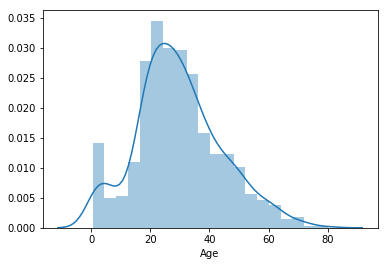

In [429]:
sns.distplot(titanic.Age.dropna())

In [430]:
np.mean(titanic.Age)

29.69911764705882

In [431]:
titanic.Age.sample(frac=???) #

SyntaxError: invalid syntax (<ipython-input-431-15df0a2ca2f2>, line 1)

## <font color='blue'>Agora que vocês sabem a fórmula, que tal tentar fazer :)</font>

### Dica: Um conjunto das médias de uma amostra do seu dado original gera uma distribuição normal
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [ ]:
def is_normal(lista):
    z, pvalue = stats.normaltest(lista)
    if(pvalue <= 0.05):
        return True
    return False

In [ ]:
media_das_amostras = []
for n in range(0,1000):
    amostra = titanic.Age.sample(frac=0.3)
    media = amostra.mean()
    media_das_amostras.append(media)
    if (n > 100) and is_normal(media_das_amostras):
        print(n)
        break

sns.distplot(media_das_amostras, hist=True)
sns.distplot(titanic.Age.dropna(), hist=True)


In [ ]:
sns.distplot(media_das_amostras, hist=True)

In [ ]:
sns.distplot(titanic.Age.dropna(), hist=True)

In [ ]:
verificador_de_normal(media_das_amostras)

### Distribuição exponencial

A distribuição exponencial é uma distribuição muito utilizada na prática para modelar tempo de falha de objetos. Por exemplo, pode ser usada para modelar o tempo que demora até uma lâmpada falhar. Ela possui um parâmetro, que pode ser interpretado da seguinte forma: é o tempo de vida médio do objeto.
Ela sofre de perda de memória!

Exemplo:

Tempo de ligação em um callcenter: 
Quanto tempo 100 pessoas ficaram em uma ligação com um callcenter ?

In [535]:
sns.set_style?

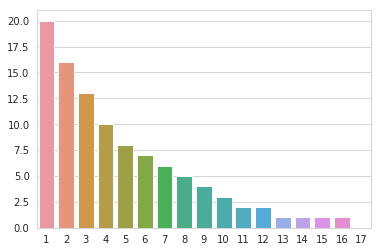

In [534]:

qnt_pessoas = [20,16,13,10,8,7,6,5,4,3,2,2,1,1,1,1,0]
tempo_de_ligacao = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

sns.barplot(tempo_de_ligacao,qnt_pessoas)

## Kolmogorov-Smirnov

“The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.”

https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d

#### Distribuiçåo acumulada

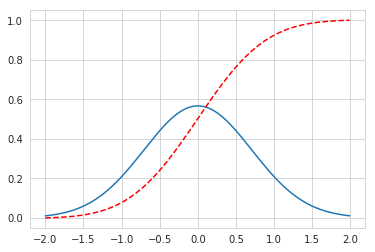

In [470]:
dx = 0.01
X  = np.arange(-2, 2, dx)
Y  = np.exp(-X ** 2)

# Cumulative counts:
# Normalize the data to a proper PDF
Y /= (dx * Y).sum()

# Compute the CDF
CY = np.cumsum(Y * dx)

# Plot both
plt.plot(X, Y)
plt.plot(X, CY, 'r--')


In [ ]:
### Caso de comparaçåo entre distriuiçåo de referência e amostra.

KstestResult(statistic=0.03612765843045013, pvalue=0.14348317116017184)

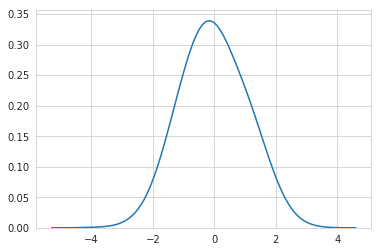

In [460]:
#generate a gaussian r.v X
#generate an array of size 1000 - norm stands for normal so this will be gaussian distributed, so X will be X ~N(0,1)
x = stats.norm.rvs(size=1000);
sns.kdeplot(np.array(x), bw=0.5) #this should plot a gaussian distribution curve
# compare x with normal distribution - this is a positive case
#statistic refers to the D_value. Since the pvalue is high we say x follows normal distribution 
stats.kstest(x, 'norm')

KstestResult(statistic=0.5000330599470476, pvalue=0.0)

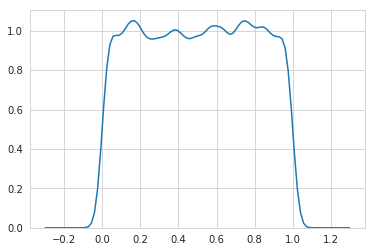

In [461]:
#lets look at a negative case
y = np.random.uniform(0,1,10000);
sns.kdeplot(np.array(y), bw=0.1)
#the flat line below should indicate it is an uniform distribution
stats.kstest(y, 'norm')
#pvalue should be 0, which means y does not follow normal distribution

### Caso entre duas amostras (Titanic)

In [537]:
fare_survived_1 = titanic[titanic.Survived == 1].Age.dropna()
fare_survived_0 = titanic[titanic.Survived == 0].Age.dropna()

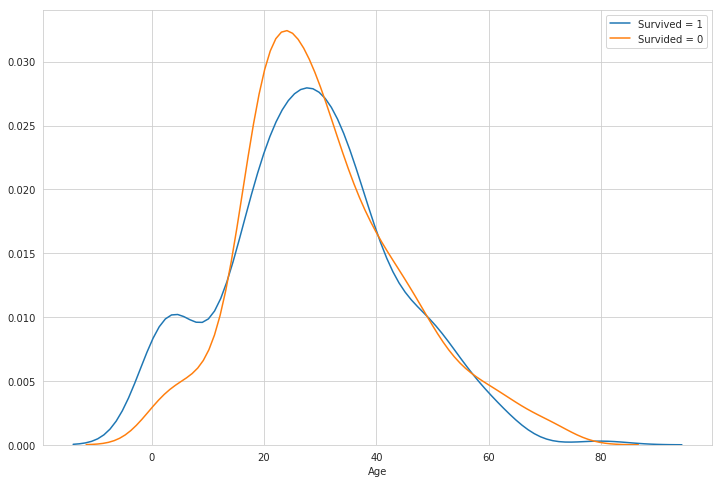

In [538]:
plt.figure(figsize=(12,8))
sns.distplot(fare_survived_1, hist=False, label = "Survived = 1")
sns.distplot(fare_survived_0, hist=False, label = "Survided = 0")

In [539]:
ks, p = stats.ks_2samp(fare_survived_0, fare_survived_1).statistic, stats.ks_2samp(fare_survived_0, fare_survived_1).pvalue 

In [536]:
stats.ks_2samp?

In [540]:
print("K-S = ", round(ks,4), "p-valor = ", round(p,4))

K-S =  0.0888 p-valor =  0.1256


/opt/tljh/user/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


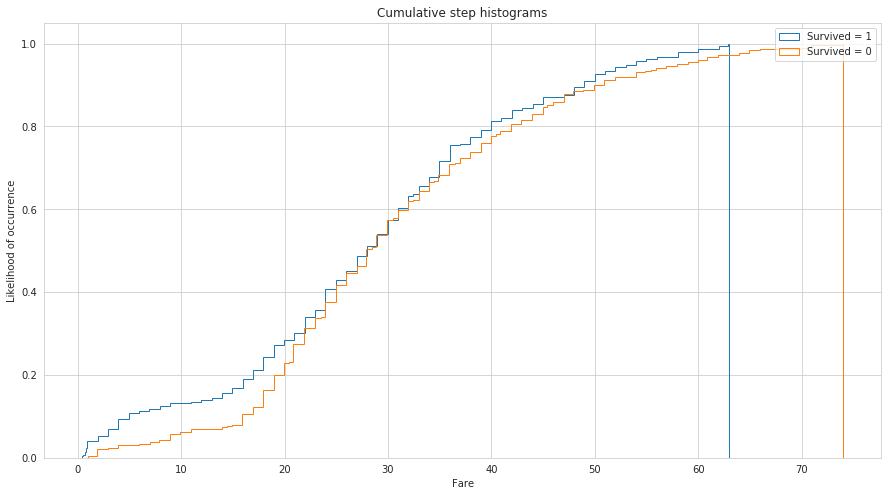

In [541]:
fig, ax = plt.subplots(figsize=(15, 8))

# plot the s1 cumulative histogram
n, bins, patches = ax.hist(fare_survived_1[fare_survived_1 < fare_survived_0.max()],500, normed=1, histtype='step',
                           cumulative=True, label='Survived = 1')

# Overlay s0 cumulative histogram.
n, bins, patches = ax.hist(fare_survived_0,500, normed=1, histtype='step',
                           cumulative=True, label='Survived = 0')

# tidy up the figure
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Age')
ax.set_ylabel('Likelihood of occurrence')

plt.show()
